In [3]:
from qiskit import *
import numpy as np
"""
from qiskit import IBMQ

token='a2afa69f70955de3c84068e58c44bd81e01740c07ff40db7e9ab824c0da8b9412da7a86e9c453f7f97ecc35fc9f09948ce053cbd9e8213b98feadba15dcc467f'
#IBMQ.enable_account(token)
IBMQ.save_account(token,overwrite=True)
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-ornl',group='ornl',project='csc517')
backend = provider.get_backend('ibm_algiers')
backend_config = backend.configuration()
"""



from qiskit_ibm_provider import IBMProvider

token='a2afa69f70955de3c84068e58c44bd81e01740c07ff40db7e9ab824c0da8b9412da7a86e9c453f7f97ecc35fc9f09948ce053cbd9e8213b98feadba15dcc467f'
#IBMQ.enable_account(token)
IBMProvider.save_account(token,overwrite=True)
provider = IBMProvider()
provider = IBMProvider(instance='ibm-q-ornl/ornl/csc517')
backend = provider.get_backend('ibm_algiers')
backend_config = backend.configuration()
pulse_alignment = backend_config.timing_constraints['pulse_alignment']

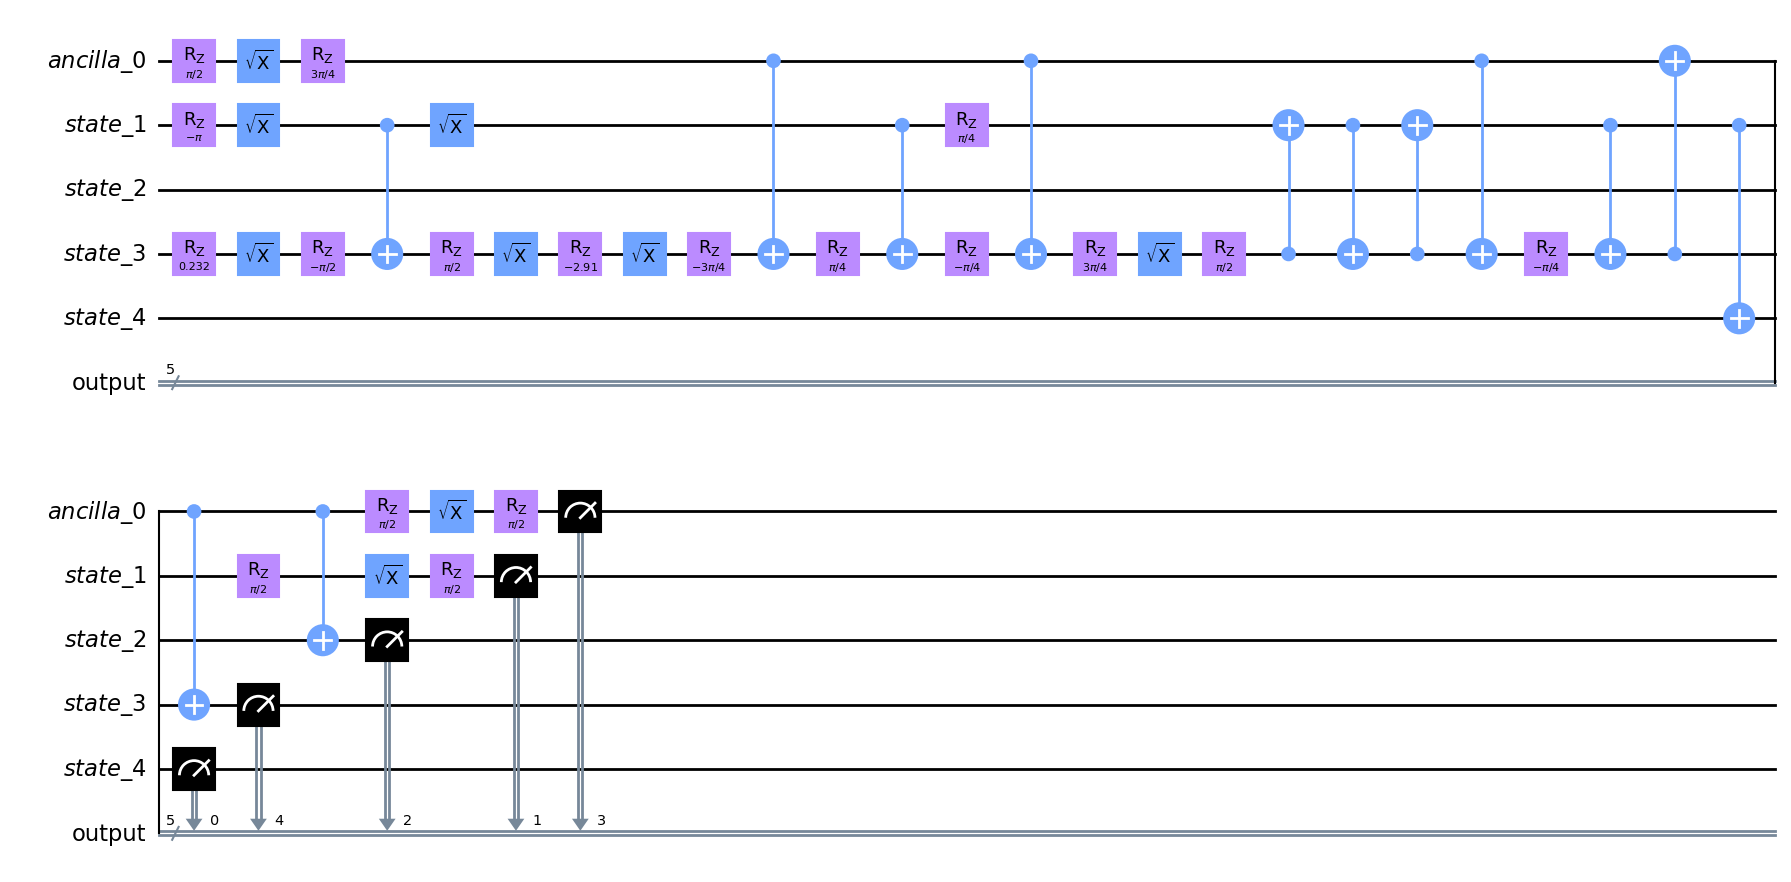

In [4]:
ancilla = QuantumRegister(1, 'ancilla_0')
A = QuantumRegister(1,'state_1')
B = QuantumRegister(1,'state_2')
C = QuantumRegister(1,'state_3')
D = QuantumRegister(1,'state_4')
Meas = ClassicalRegister(5,'output')

circuit = QuantumCircuit(ancilla, A, B, C, D, Meas)
circuit1 = QuantumCircuit(ancilla, A, B, C, D, Meas)

angle = 0.5*np.pi

circuit1.initialize([np.cos(1*angle/2),np.sin(1*angle/2)],B)
circuit1.initialize([np.cos(2*angle/2),np.sin(2*angle/2)],C)
circuit1.initialize([np.cos(3*angle/2),np.sin(3*angle/2)],D)

circuit.rz(1.5707963267948966, ancilla)
circuit.sx(ancilla)
circuit.rz(2.356194490192345, ancilla)
circuit.rz(0.23182380450040263, C)
circuit.sx(C)
circuit.rz(-1.5707963267948966, C)
circuit.rz(-3.141592653589793, A)
circuit.sx(A)
circuit.cx(A, C)
circuit.sx(A)
circuit.rz(1.5707963267948966, C)
circuit.sx(C)
circuit.rz(-2.9097688490893905, C)
circuit.sx(C)
circuit.rz(-2.3561944901923457, C)
circuit.cx(ancilla, C)
circuit.rz(0.7853981633974483, C)
circuit.cx(A, C)
circuit.rz(0.7853981633974483, A)
circuit.rz(-0.7853981633974483, C)
circuit.cx(ancilla, C)
circuit.rz(2.356194490192345, C)
circuit.sx(C)
circuit.rz(1.5707963267948966, C)
circuit.cx(C, A)
circuit.cx(A, C)
circuit.cx(C, A)
circuit.cx(ancilla, C)
circuit.rz(-0.7853981633974483, C)
circuit.cx(A, C)
circuit.cx(C, ancilla)
circuit.cx(ancilla, C)
circuit.cx(ancilla, B)
circuit.rz(1.5707963267948966, ancilla)
circuit.sx(ancilla)
circuit.rz(1.5707963267948966, ancilla)
circuit.cx(A, D)
circuit.rz(1.5707963267948966, A)
circuit.sx(A)
circuit.rz(1.5707963267948966, A)
#circuit.barrier(qreg_q[18], qreg_q[24], qreg_q[21], qreg_q[1], qreg_q[4], qreg_q[10], qreg_q[7], qreg_q[13], qreg_q[16], qreg_q[22], qreg_q[19], qreg_q[25], qreg_q[8], qreg_q[2], qreg_q[11], qreg_q[5], qreg_q[17], qreg_q[14], qreg_q[20], qreg_q[23], qreg_q[3], qreg_q[26], qreg_q[0], qreg_q[6], qreg_q[12], qreg_q[9], qreg_q[15])
circuit.measure(D, 0)
circuit.measure(A, 1)
circuit.measure(B, 2)
circuit.measure(ancilla, 3)
circuit.measure(C, 4)
    

circuit.draw(output='mpl')

angle = 0.5, shots = 50000


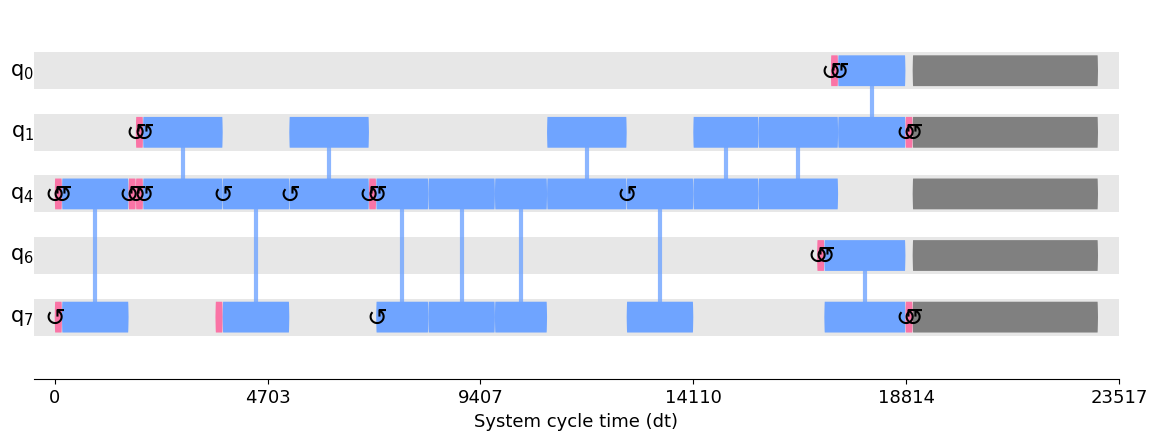

In [9]:
layout = [1,7,0,4,6]
initialize = transpile(circuit1, backend, optimization_level=1, initial_layout=layout, seed_transpiler=42, routing_method='basic')
Bellmeasure = transpile(circuit, backend, optimization_level=1, initial_layout=layout, seed_transpiler=42, routing_method='basic')
final = initialize.compose(Bellmeasure)


from qiskit.visualization.timeline import draw, IQXSimple 

shots = 50000

name = 'angle = ' + str(angle/np.pi) + ', shots = ' + str(shots)
print(name)
#final.draw('mpl',cregbundle=False,idle_wires=False)
final = transpile(final, backend, scheduling_method='alap')
draw(final, style=IQXSimple())

In [54]:
shots = 50000


job = backend.run(final,shots=shots)
job.update_name(name=name)

'angle = 0.5, shots = 50000'